Stock Price Prediction Model

In [29]:
import math
import pandas_datareader as web
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Import the web module from pandas_datareader
from pandas_datareader import data as web_data
import yfinance as yf
yf.pdr_override()

In [30]:

df = web_data.get_data_yahoo('TCS.NS', start='2015-01-01', end='2023-06-10')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1075.850586,366830
2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1090.178101,925740
2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1073.610718,1754242
2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1034.030762,2423784
2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1021.816528,2636332
...,...,...,...,...,...,...
2023-06-05,3315.000000,3327.000000,3285.050049,3288.899902,3288.899902,1861468
2023-06-06,3280.000000,3288.850098,3220.600098,3232.300049,3232.300049,2022849
2023-06-07,3253.000000,3278.850098,3241.000000,3274.899902,3274.899902,1567196


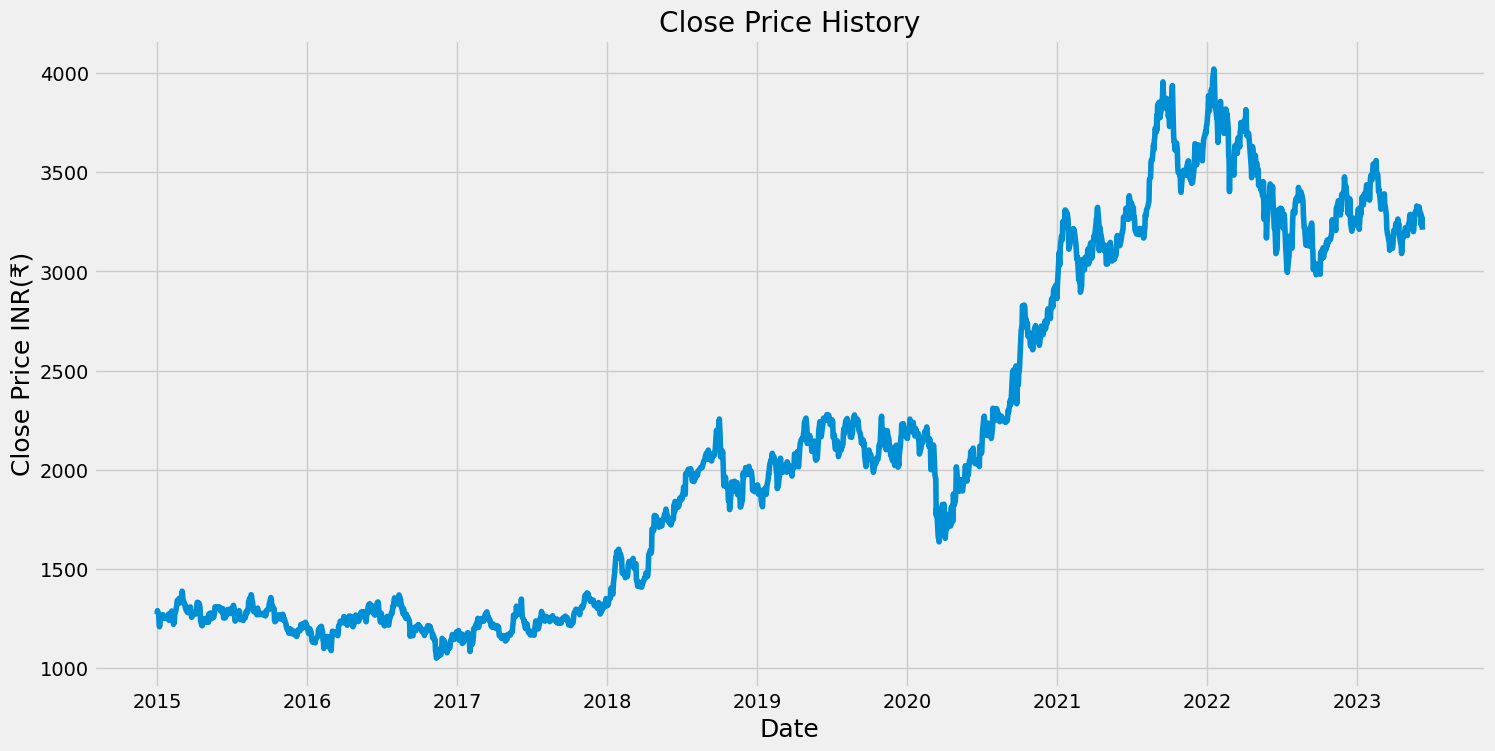

In [31]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR(₹)',fontsize=18)
plt.show()

In [32]:
#Creating a dataframe with "Close" Column only
data=df.filter(['Close'])
#Convert dataframe to numpy array
dataset=data.values
#Get the number of rows for training
training_data_len=math.ceil(len(dataset)*.8)
training_data_len


1668

In [33]:
#Scaling Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.07485075],
       [0.08056055],
       [0.07395806],
       ...,
       [0.74929048],
       [0.73633815],
       [0.72719238]])

In [34]:
#Training Dataset
#Sclaed Training Dataset
train_data=scaled_data[0:training_data_len,:]
#Splitting the data into x_traing and y_train
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.07485075, 0.08056055, 0.07395806, 0.05818452, 0.05331684,
       0.0577129 , 0.06925042, 0.06881249, 0.06682499, 0.07087577,
       0.07376438, 0.07259375, 0.06903146, 0.0672545 , 0.06950307,
       0.06946096, 0.06778508, 0.06752401, 0.0738486 , 0.07469914,
       0.06415539, 0.06957043, 0.07698982, 0.06958729, 0.07600448,
       0.07993736, 0.06935146, 0.05726653, 0.06042462, 0.06080359,
       0.07370542, 0.08146167, 0.09002636, 0.09767315, 0.09674678,
       0.10030065, 0.10166496, 0.09618252, 0.09352973, 0.0945235 ,
       0.09571091, 0.11366567, 0.10861274, 0.10026697, 0.09190439,
       0.09121381, 0.08512504, 0.08723043, 0.08104902, 0.07767197,
       0.08127638, 0.07717511, 0.0833902 , 0.08586612, 0.08691039,
       0.08255647, 0.0796005 , 0.06938518, 0.0696715 , 0.07798355])]
[0.0762655577635622]

[array([0.07485075, 0.08056055, 0.07395806, 0.05818452, 0.05331684,
       0.0577129 , 0.06925042, 0.06881249, 0.06682499, 0.07087577,
       0.07376438, 0.07259375, 0.069

In [35]:
#Convert the x_train and y_train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
#Reshaping Data into 3-D for LSTM Model
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1608, 60, 1)

In [37]:
#Building LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [38]:
#Compiling The Model (Adam optimizer controls the learning rate of algorithm)
model.compile(optimizer='adam',loss='mean_squared_error')

In [71]:
#Training The Model
model.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
101/101 [==============================] - 6s 61ms/step - loss: 2.3330e-04
Epoch 2/20
101/101 [==============================] - 7s 70ms/step - loss: 2.2413e-04
Epoch 3/20
101/101 [==============================] - 6s 60ms/step - loss: 1.9307e-04
Epoch 4/20
101/101 [==============================] - 7s 73ms/step - loss: 2.1024e-04
Epoch 5/20
101/101 [==============================] - 6s 64ms/step - loss: 1.7591e-04
Epoch 6/20
101/101 [==============================] - 7s 73ms/step - loss: 1.7010e-04
Epoch 7/20
101/101 [==============================] - 7s 66ms/step - loss: 1.7434e-04
Epoch 8/20
101/101 [==============================] - 7s 68ms/step - loss: 1.7465e-04
Epoch 9/20
101/101 [==============================] - 7s 70ms/step - loss: 1.7674e-04
Epoch 10/20
101/101 [==============================] - 7s 64ms/step - loss: 1.4586e-04
Epoch 11/20
101/101 [==============================] - 7s 74ms/step - loss: 1.7226e-04
Epoch 12/20
101/101 [==============================]

In [72]:
#Create The testing Dataset
#Create a new array with scaled values from index 1608 to 2084
test_data=scaled_data[training_data_len - 60:,:]
#Create The DataSets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [73]:
#Convert the data to numpy
x_test=np.array(x_test)

In [74]:
#Reshape The Data into 3-D
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [75]:
#Get The Models Predicted Price Values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 0s 28ms/step


In [76]:
#Get The Root Mean Squared Error
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

48.904852511566325

<ipython-input-77-1395405bcf88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


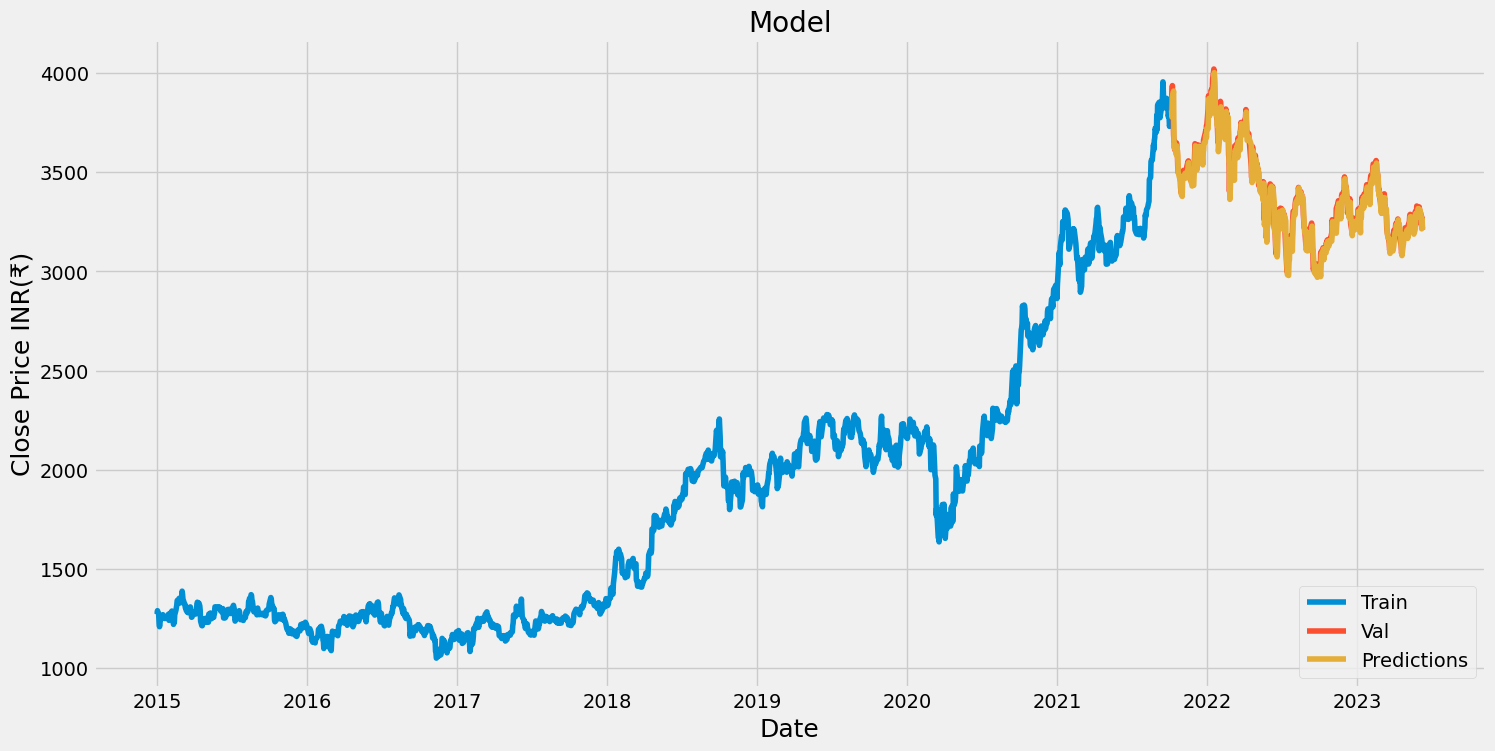

In [77]:
#Plot The Data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize The data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR(₹)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [78]:
#Show The Valid and Predicted Prices
valid

,Close,Predictions
Date,,
2021-10-06,3810.899902,3809.760742
2021-10-07,3892.899902,3776.880127
2021-10-08,3935.649902,3879.248535
2021-10-11,3685.600098,3908.321045
2021-10-12,3652.850098,3622.122314
...,...,...
2023-06-05,3288.899902,3288.823730
2023-06-06,3232.300049,3274.341064
2023-06-07,3274.899902,3213.728271


In [80]:
#Checking Accuracy of the Model
from sklearn.metrics import r2_score
score = r2_score(valid['Close'],valid['Predictions'])
score

0.9525529289063694